In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex = False)
df['mileage'] = pd.to_numeric(df['mileage'], errors = 'coerce')
df['engine'] = df['engine'].str.replace(' CC', '', regex = False)
df['engine'] = pd.to_numeric(df['engine'], errors = 'coerce')
df['max_power'] = df['max_power'].str.replace(' bhp', '', regex = False)
df['max_power'] = pd.to_numeric(df['max_power'], errors = 'coerce')
df.drop('torque', axis = 1, inplace = True)

In [5]:
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,NaN,1061.0,57.50,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [6]:
df.shape

(8128, 12)

In [7]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          309
engine           221
max_power        216
seats            221
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [9]:
df['num_year'] = 2026 - df['year']
df.drop('year', axis = 1, inplace = True)

In [10]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,num_year
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,12
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,12
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,20
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,16
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,19


In [11]:
df.duplicated().sum()

np.int64(1188)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.info()

<class 'pandas.DataFrame'>
Index: 6631 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6631 non-null   str    
 1   selling_price  6631 non-null   int64  
 2   km_driven      6631 non-null   int64  
 3   fuel           6631 non-null   str    
 4   seller_type    6631 non-null   str    
 5   transmission   6631 non-null   str    
 6   owner          6631 non-null   str    
 7   mileage        6631 non-null   float64
 8   engine         6631 non-null   float64
 9   max_power      6631 non-null   float64
 10  seats          6631 non-null   float64
 11  num_year       6631 non-null   int64  
dtypes: float64(4), int64(3), str(5)
memory usage: 673.5 KB


In [14]:
df['fuel'].value_counts()

fuel
Diesel    3658
Petrol    2973
Name: count, dtype: int64

In [15]:
df['seller_type'].value_counts()

seller_type
Individual          5939
Dealer               665
Trustmark Dealer      27
Name: count, dtype: int64

In [16]:
df['transmission'].value_counts()

transmission
Manual       6056
Automatic     575
Name: count, dtype: int64

In [17]:
df['owner'].value_counts()

owner
First Owner             4126
Second Owner            1861
Third Owner              486
Fourth & Above Owner     153
Test Drive Car             5
Name: count, dtype: int64

In [18]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,num_year
count,6.631000e+03,6.631000e+03,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000
mean,5.296566e+05,7.336993e+04,19.434536,1435.693259,88.118980,5.440054,12.385462
std,5.260015e+05,5.882501e+04,4.011447,494.553445,31.748478,0.988312,3.900434
min,2.999900e+04,1.000000e+03,0.000000,624.000000,34.200000,2.000000,6.000000
25%,2.500000e+05,3.715600e+04,16.800000,1197.000000,68.000000,5.000000,9.000000
50%,4.250000e+05,6.800000e+04,19.400000,1248.000000,81.860000,5.000000,12.000000
75%,6.500000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000,15.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,32.000000


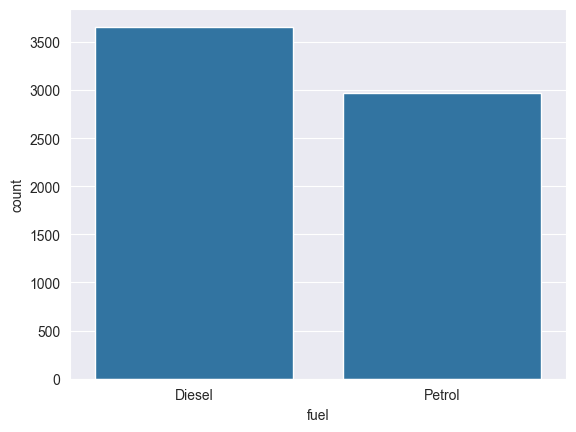

In [19]:
sns.countplot(x = 'fuel', data = df);

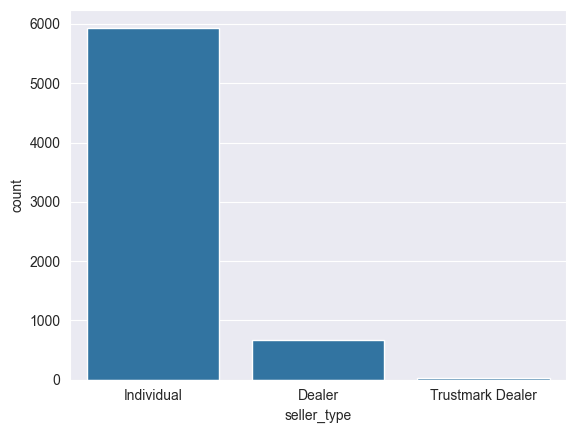

In [20]:
sns.countplot(x = 'seller_type', data = df);

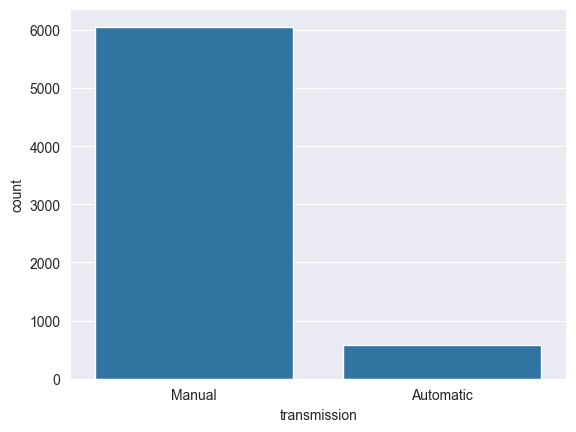

In [21]:
sns.countplot(x = 'transmission', data = df);

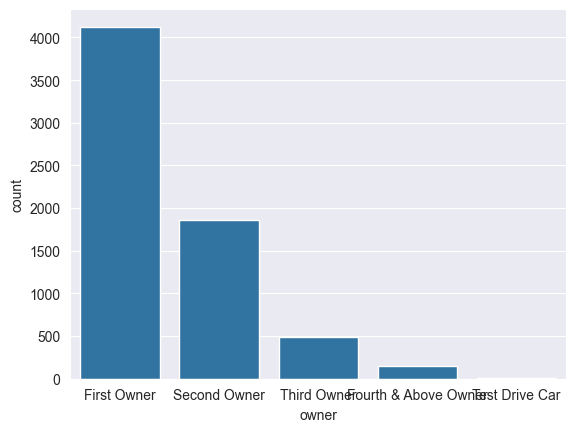

In [22]:
sns.countplot(x = 'owner', data = df);

In [23]:
df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}}, inplace = True)
df.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)
df.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)
df.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)
df['fuel'] = pd.to_numeric(df['fuel'], errors='coerce')
df['seller_type'] = pd.to_numeric(df['seller_type'], errors='coerce')
df['transmission'] = pd.to_numeric(df['transmission'], errors='coerce')
df['owner'] = pd.to_numeric(df['owner'], errors='coerce')

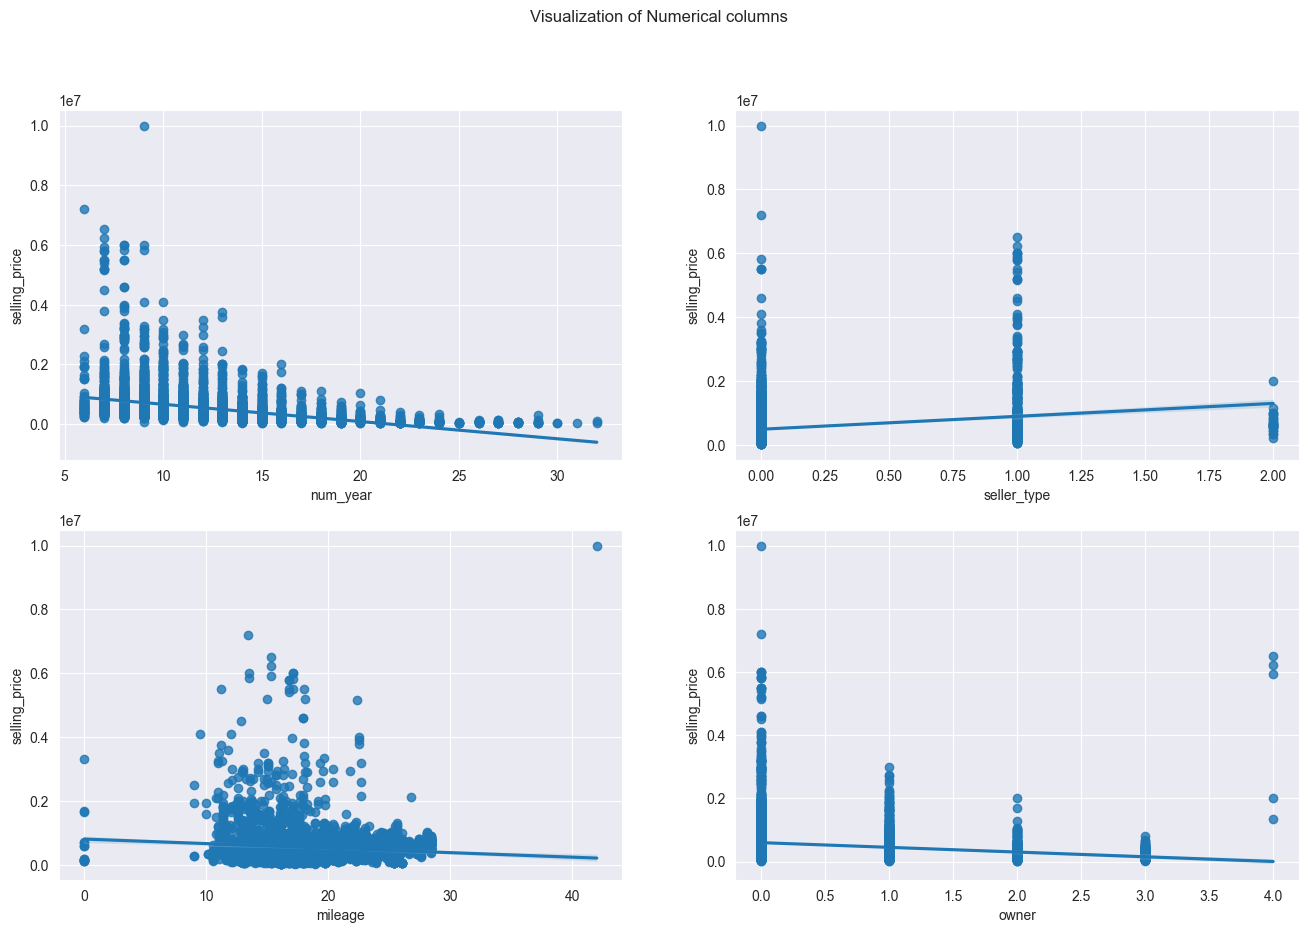

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (16,10))
fig.suptitle('Visualization of Numerical columns')
sns.regplot(x = 'num_year', y = 'selling_price', data = df, ax = axes[0,0])
sns.regplot(x = 'seller_type', y = 'selling_price', data = df, ax = axes[0,1])
sns.regplot(x = 'mileage', y = 'selling_price', data = df, ax = axes[1,0])
sns.regplot(x = 'owner', y = 'selling_price', data = df, ax = axes[1,1]);

In [25]:
X = df.drop(['selling_price', 'name'], axis = 1)
Y = df['selling_price']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lr = lin_reg.predict(X_test)

In [29]:
print("===== Linear Regression Results =====")
print("MAE:", mean_absolute_error(Y_test, Y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print("R2 Score:", r2_score(Y_test, Y_pred_lr))

===== Linear Regression Results =====
MAE: 180009.83394901385
RMSE: 322525.0004211417
R2 Score: 0.621909565583532


In [30]:
rf_model = RandomForestRegressor(random_state=2)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [31]:
print("\n===== Random Forest Results =====")
print("MAE:", mean_absolute_error(Y_test, Y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("R2 Score:", r2_score(Y_test, Y_pred_rf))


===== Random Forest Results =====
MAE: 78018.52770083491
RMSE: 147494.08850588845
R2 Score: 0.9209288327855418


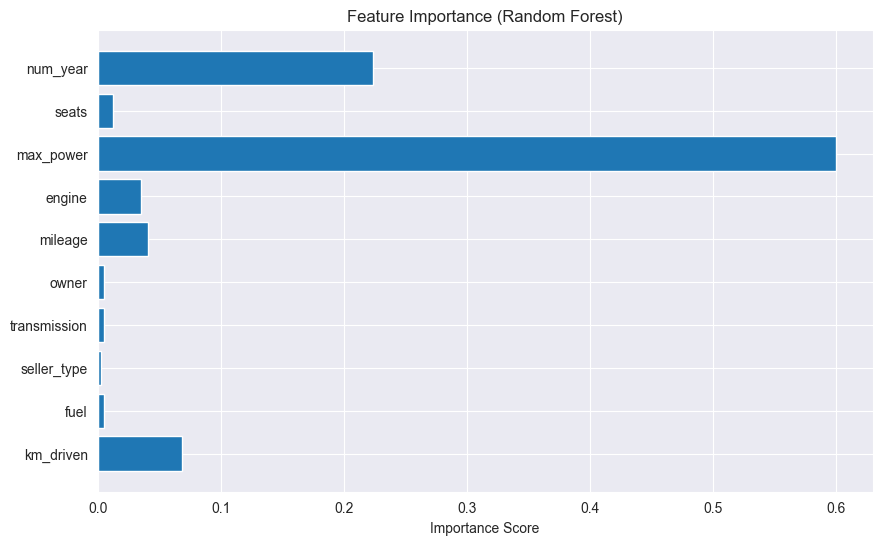

In [32]:
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize = (10,6))
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [33]:
new_car = pd.DataFrame({
    'km_driven': [10000],
    'mileage': [18],
    'engine': [1197],
    'max_power': [81],
    'seats': [5],
    'fuel': [1],
    'seller_type': [0],
    'transmission': [0],
    'owner': [0],
    'num_year': [6]
})

In [34]:
new_car = new_car[X.columns]
new_car_scaled = scaler.transform(new_car)
predicted_price = rf_model.predict(new_car_scaled)
print("\n===== Predicted Price for New Car =====")
print("\t  ", predicted_price[0])


===== Predicted Price for New Car =====
		  637320.0
